In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime

import tensorflow as tf
from tensorflow import keras

## Preprocess data

labels: turn valuen 0-9 into one hot encoding-> l_new = p.zeros(10); l_new[label_old] = 1 should do the job-> function is provided: keras.utils.to_categorical

inputs: normalize to be between 0 and one instead of 0-255

resources: 
https://www.youtube.com/watch?v=J6Ok8p463C4 (Google - Getting Started with Keras)

https://keras.io/api/layers/activations/ activation functions in Keras

https://data-flair.training/blogs/keras-loss-functions/ loss functions 

https://www.tutorialspoint.com/keras/keras_model_compilation.htm model compilation

https://stackoverflow.com/questions/50568409/report-keras-model-evaluation-metrics-every-10-epochs & https://keras.io/guides/writing_your_own_callbacks/ custom callbacks

https://www.programcreek.com/python/example/89706/keras.layers.Dropout seed in Dropout-Layer (NOT YET USED) 

https://www.machinecurve.com/index.php/2019/12/18/how-to-use-dropout-with-keras/ "𝑝≈0.5. This value has shown the best empirical results when being tested with the MNIST dataset." -> https://jmlr.org/papers/v15/srivastava14a.html

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num = 10

y_train = keras.utils.to_categorical(y_train,num)
y_test = keras.utils.to_categorical(y_test,num)

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

x_train_orig = x_train
x_test_orig = x_test

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = np.zeros((x_test.shape[0],784))

for j in range(0,len(x_test)):
    x_test[j,:] = np.ndarray.flatten(X_test[j,:,:])

## Ex. 1) Linear model

In [3]:
model1 = keras.Sequential(
    [
        keras.Input(shape=(784,),name='digits'),
        keras.layers.Dense(10,activation = 'softmax',
                             name='predictions',
                             kernel_initializer='zeros',
                             bias_initializer='zeros',),
    ]
)

sgd_model = keras.optimizers.SGD(learning_rate=0.5,momentum=0.0)
model1.compile(optimizer=sgd_model,
              loss ='categorical_crossentropy', 
              metrics = 'accuracy')

b_size = 100
num_iter = 10000

num_epoch = round(num_iter/(x_train.shape[0]/b_size))

In [4]:
history1 = model1.fit(x_train,y_train,batch_size=100,epochs=num_epoch)
summ1 =model1.summary()

Epoch 1/17
600/600 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.8686
Epoch 2/17
600/600 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.9014
Epoch 3/17
600/600 [==============================] - 1s 1ms/step - loss: 0.3262 - accuracy: 0.9091
Epoch 4/17
600/600 [==============================] - 1s 1ms/step - loss: 0.3107 - accuracy: 0.9130
Epoch 5/17
600/600 [==============================] - 1s 1ms/step - loss: 0.3004 - accuracy: 0.9161
Epoch 6/17
600/600 [==============================] - 1s 983us/step - loss: 0.2930 - accuracy: 0.9182
Epoch 7/17
600/600 [==============================] - 1s 981us/step - loss: 0.2872 - accuracy: 0.9199
Epoch 8/17
600/600 [==============================] - 1s 1ms/step - loss: 0.2826 - accuracy: 0.9211
Epoch 9/17
600/600 [==============================] - 1s 986us/step - loss: 0.2789 - accuracy: 0.9216
Epoch 10/17
600/600 [==============================] - 1s 990us/step - loss: 0.2757 - accuracy

In [ ]:
log_dir_lin = "logs/fit/model_lin" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#log_dir_lin = "logs/fit/model_lin_no_update_freq"
tensorboard_callback_lin = keras.callbacks.TensorBoard(
                            log_dir=log_dir_lin, 
                            histogram_freq=1, 
                            update_freq=100) # should save progress every 100 batches BUT DIDNT REALLY...

history_callback_lin = model_lin.fit(  # https://keras.io/api/models/model_training_apis/
        x=X_train,  # training data
        y=y_train,  # training labels
        batch_size=BATCH_SIZE,
        #epochs=EPOCHS,
        epochs=EPOCHS,
        verbose=2, # print one line per epoch
        #callbacks=None,
        #callbacks=[CustomCallback()],
        callbacks = [tensorboard_callback_lin],
        #validation_split=0.0,
        #validation_data=None,
        validation_data=(X_test, y_test),
        shuffle=True, # shuffle training data before each epoch
        #class_weight=None,
        #sample_weight=None,
        initial_epoch=0, # 'useful for resuming a previous training run'
        #initial_epoch=ep, # 'useful for resuming a previous training run'
        #steps_per_epoch=100,
        steps_per_epoch=None, # 'default None is equal to the number of samples 
                          # in your dataset divided by the batch size'
                          # 60000/100 = 600 steps per epoch, 
                          # 10000 iterations should be run in total -> 10000/600 = 16.666 ~ 17
        #validation_steps=None,
        #validation_batch_size=None,
        #validation_freq=1,
        #max_queue_size=10,
        #workers=1,
        #use_multiprocessing=False,
)


loss_history_lin = history_callback_lin.history["loss"]

numpy_loss_history = np.array(loss_history_lin)
np.savetxt("loss_history_"+ log_dir_lin[9::] +".txt", numpy_loss_history, delimiter=",")

In [40]:
loss1 = history1.history['loss']
acc1 = history1.history['accuracy']

100/100 [==============================] - 0s 819us/step - loss: 0.2702 - accuracy: 0.9231


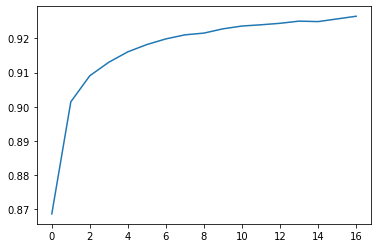

In [6]:
results1 = model1.evaluate(x_test, y_test,batch_size=100)

plt.plot(acc)

## Second model

In [7]:
weight_init = tf.keras.initializers.TruncatedNormal(mean=0, stddev=0.01)
biases_init = tf.keras.initializers.Constant(0.1)

model2 = tf.keras.models.Sequential(
    [
        keras.Input(shape=(784,),name='digits'),
        keras.layers.Dense(1500, activation="relu", kernel_initializer=weight_init,bias_initializer= biases_init, name="dense_1"),
        keras.layers.Dense(1500, activation="relu",kernel_initializer=weight_init,bias_initializer=biases_init, name="dense_2"),
        keras.layers.Dense(1500, activation="relu",kernel_initializer=weight_init,bias_initializer=biases_init,name="dense_3"),
        keras.layers.Dense(10,activation = 'softmax', name='predictions', kernel_initializer=weight_init,bias_initializer=biases_init),
    ]
)

In [8]:
opt_adam = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
)

model2.compile(optimizer=opt_adam,
              loss ='categorical_crossentropy', 
              metrics = 'accuracy')

num_iter2 = 20000
num_epoch2 = round(num_iter2/(x_train.shape[0]/b_size))

In [9]:
history2 = model2.fit(x_train,y_train,batch_size=100,epochs=num_epoch2)
summ2 =model2.summary()

Epoch 1/33
600/600 [==============================] - 33s 54ms/step - loss: 0.2708 - accuracy: 0.9168
Epoch 2/33
600/600 [==============================] - 33s 56ms/step - loss: 0.0928 - accuracy: 0.9717
Epoch 3/33
600/600 [==============================] - 33s 55ms/step - loss: 0.0633 - accuracy: 0.9809
Epoch 4/33
600/600 [==============================] - 33s 54ms/step - loss: 0.0470 - accuracy: 0.9851
Epoch 5/33
600/600 [==============================] - 33s 54ms/step - loss: 0.0360 - accuracy: 0.9887
Epoch 6/33
600/600 [==============================] - 35s 58ms/step - loss: 0.0319 - accuracy: 0.9903
Epoch 7/33
600/600 [==============================] - 34s 56ms/step - loss: 0.0263 - accuracy: 0.9922
Epoch 8/33
600/600 [==============================] - 33s 55ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 9/33
600/600 [==============================] - 34s 56ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 10/33
600/600 [==============================] - 37s 61ms/step - loss: 0.016

100/100 [==============================] - 1s 11ms/step - loss: 0.1567 - accuracy: 0.9808


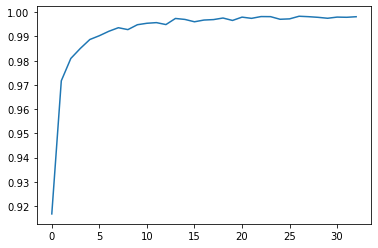

In [10]:
loss2 = history2.history['loss']
acc2 = history2.history['accuracy']

results2 = model2.evaluate(x_test, y_test,batch_size=100)

plt.plot(acc2)

## Third model

In [18]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(784,),name='digits'),
        keras.layers.Dense(1500, activation="relu", kernel_initializer=weight_init,bias_initializer= biases_init, name="dense_1"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1500, activation="relu",kernel_initializer=weight_init,bias_initializer=biases_init, name="dense_2"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1500, activation="relu",kernel_initializer=weight_init,bias_initializer=biases_init,name="dense_3"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10,activation = 'softmax', name='predictions', kernel_initializer=weight_init,bias_initializer=biases_init),
    ]
)

model3.compile(optimizer=opt_adam,
              loss ='categorical_crossentropy', 
              metrics = 'accuracy')

In [19]:
history3 = model3.fit(x_train,y_train,batch_size=100,epochs=num_epoch2)
summ3 =model3.summary()

Epoch 1/33
600/600 [==============================] - 35s 59ms/step - loss: 0.4254 - accuracy: 0.8690
Epoch 2/33
600/600 [==============================] - 35s 58ms/step - loss: 0.2098 - accuracy: 0.9400
Epoch 3/33
600/600 [==============================] - 37s 61ms/step - loss: 0.1725 - accuracy: 0.95060s - loss: 0.173
Epoch 4/33
600/600 [==============================] - 37s 62ms/step - loss: 0.1550 - accuracy: 0.9546
Epoch 5/33
600/600 [==============================] - 36s 60ms/step - loss: 0.1400 - accuracy: 0.9602
Epoch 6/33
600/600 [==============================] - 35s 59ms/step - loss: 0.1270 - accuracy: 0.9628
Epoch 7/33
600/600 [==============================] - 35s 58ms/step - loss: 0.1191 - accuracy: 0.9644
Epoch 8/33
600/600 [==============================] - 36s 60ms/step - loss: 0.1104 - accuracy: 0.9671
Epoch 9/33
600/600 [==============================] - 35s 59ms/step - loss: 0.1068 - accuracy: 0.9693
Epoch 10/33
600/600 [==============================] - 35s 58ms/st

100/100 [==============================] - 1s 11ms/step - loss: 0.0827 - accuracy: 0.9785


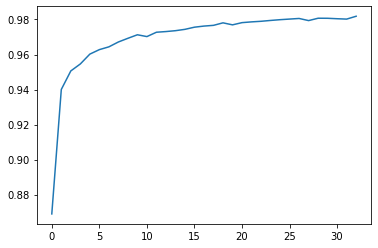

In [20]:
loss3 = history3.history['loss']
acc3 = history3.history['accuracy']

results3 = model3.evaluate(x_test, y_test,batch_size=100)

plt.plot(acc3)

## Fourth model

In [26]:
x_train_conv = np.expand_dims(x_train_orig, -1)
x_test_conv = np.expand_dims(x_test_orig, -1)

In [22]:
model4 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(filters = 32,kernel_size=(5,5),padding='same',strides=(1,1),activation='relu',use_bias=True,kernel_initializer=weight_init,bias_initializer = biases_init,name='conv_layer1'),
        keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2), name ='downsampling1',padding='valid'),
        keras.layers.Conv2D(filters = 64,kernel_size=(5,5),padding='same',strides=(1,1),activation='relu',use_bias=True,kernel_initializer=weight_init,bias_initializer = biases_init,name='conv_layer2'),
        keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2), name ='downsampling2',padding='valid'),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation = 'softmax', name='predictions', kernel_initializer=weight_init,bias_initializer=biases_init),
    ]
)


model4.compile(optimizer=opt_adam,
              loss ='categorical_crossentropy', 
              metrics = 'accuracy')

history4 = model4.fit(x_train_conv,y_train,batch_size=100,epochs=num_epoch2)
summ4 =model4.summary()

Epoch 1/33
600/600 [==============================] - 56s 93ms/step - loss: 0.2895 - accuracy: 0.9056
Epoch 2/33
600/600 [==============================] - 56s 93ms/step - loss: 0.0570 - accuracy: 0.9815
Epoch 3/33
600/600 [==============================] - 56s 94ms/step - loss: 0.0429 - accuracy: 0.9863
Epoch 4/33
600/600 [==============================] - 56s 94ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 5/33
600/600 [==============================] - 56s 94ms/step - loss: 0.0282 - accuracy: 0.9914
Epoch 6/33
600/600 [==============================] - 56s 93ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 7/33
600/600 [==============================] - 56s 94ms/step - loss: 0.0214 - accuracy: 0.9930
Epoch 8/33
600/600 [==============================] - 56s 93ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 9/33
600/600 [==============================] - 57s 95ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 10/33
600/600 [==============================] - 56s 93ms/step - loss: 0.014

100/100 [==============================] - 2s 22ms/step - loss: 0.0684 - accuracy: 0.9881


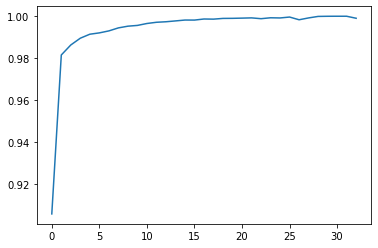

In [28]:
loss4 = history4.history['loss']
acc4 = history4.history['accuracy']

results4 = model4.evaluate(x_test_conv, y_test,batch_size=100)

plt.plot(acc4)

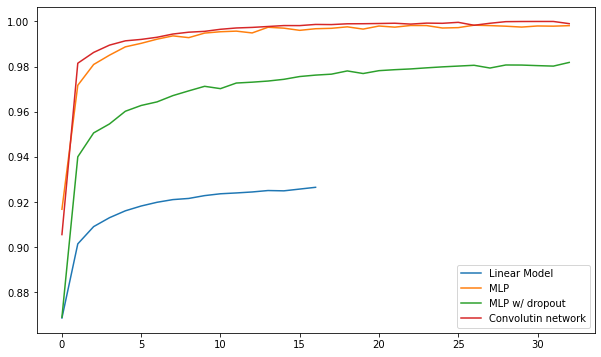

In [50]:
plt.figure(figsize=(10,6))

plt.plot(acc1,label='Linear Model')
plt.plot(acc2,label='MLP')
plt.plot(acc3,label='MLP w/ dropout')
plt.plot(acc4,label='Convolutin network')
plt.legend();

In [64]:
print('The linear model\'s accuracy on the test data is ' + str(round(results1[1],4)))
print('The MLP model accuracy on the test data is ' + str(round(results2[1],4)))
print('The MLP with dropout model\'s accuracy on the test data is ' + str(round(results3[1],4)))
print('The MLP with dropout model\'s accuracy on the test data is ' + str(round(results4[1],4)))

The linear model's accuracy on the test data is 0.9231
The MLP model accuracy on the test data is 0.9808
The MLP with dropout model's accuracy on the test data is 0.9785
The MLP with dropout model's accuracy on the test data is 0.9881
